In [12]:
import sys
sys.path.append("../../src/")
import uncertainpy.gradual as grad

In [13]:
def compute_gradient(model, arg1, arg2, h, agg_f, inf_f):
    original_strength = arg2.get_strength()
    initial_weight = arg1.get_initial_weight()
    arg1.reset_initial_weight(initial_weight+h) # change it to the counterfctual value
    grad.algorithms.computeStrengthValues(model, agg_f, inf_f)
    counterfactual_strength = arg2.get_strength()
    gradient = (counterfactual_strength-original_strength)/h
    arg1.reset_initial_weight(initial_weight) # change it back to the original value
    grad.algorithms.computeStrengthValues(model, agg_f, inf_f)
    return gradient

In [14]:
# Computation via Forward Propagation
bag = grad.BAG("../../bags/aaa_test.bag")

# DF-QuAD
agg_f = grad.semantics.modular.ProductAggregation()
inf_f = grad.semantics.modular.LinearInfluence(conservativeness=1)

#returns dictionary of strength values if needed
strength_values = grad.algorithms.computeStrengthValues(bag, agg_f, inf_f)

# for arg in bag.arguments.values():
    # print((arg.name,arg.strength))

In [15]:
import time
start = time.time()
# arg1 = bag.arguments[""]
arg2 = bag.arguments["A"]
# topic_arg = bag.arguments["A"]
h = 0.00000001
for arg1 in bag.arguments.values():
    gradient = compute_gradient(bag, arg1, arg2, h, agg_f, inf_f)
    print(f"gradient for argument {arg1.name} is {gradient}")
end = time.time()
print(f"Time: {end-start}")

gradient for argument A is 0.750000006544127
gradient for argument B is -0.24999999848063226
gradient for argument C is 0.24999999848063226
gradient for argument D is 0.4999999969612645
Time: 0.0


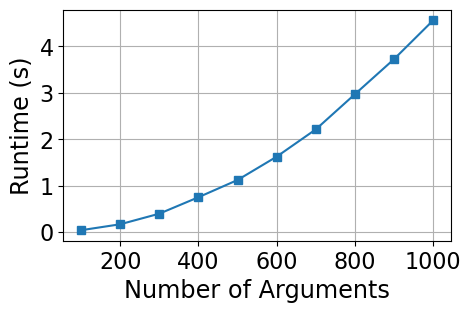

In [16]:
import matplotlib.pyplot as plt

x = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
y = [0.042009592, 0.170037985, 0.398091078, 0.75217247, 1.123258114,
     1.625906229, 2.213510513, 2.971684456, 3.726854801, 4.562047005]

plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='s')
# plt.title('X vs Y')
plt.xlabel('Number of Arguments', fontsize='xx-large')
plt.ylabel('Runtime (s)', fontsize='xx-large')
plt.xticks([200, 400, 600, 800, 1000])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()

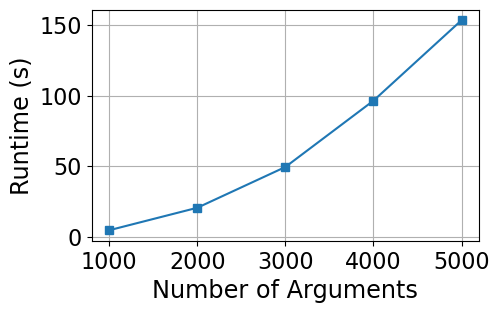

In [17]:
import matplotlib.pyplot as plt

x = [1000, 2000, 3000, 4000, 5000]
y = [4.562047005, 20.51074195, 49.43536496, 96.46829247, 153.538851]
plt.figure(figsize=(5, 3))
plt.plot(x, y, marker='s')
# plt.title('X vs Y')
plt.xlabel('Number of Arguments', fontsize='xx-large')
plt.ylabel('Runtime (s)', fontsize='xx-large')
plt.xticks([1000, 2000, 3000, 4000, 5000])
plt.tick_params(axis='both', which='major', labelsize=16)
plt.grid(True)
plt.show()